##**Netflix Movies Rating Prediction**
---

###**Name : Fozia Roshan**

###**Internship : Arch Technologies**
---



###**Project Overview**

This project analyzes Netflix movie ratings and predicts **unseen movie ratings** using machine learning regression models.  
The workflow includes **EDA, model training, evaluation, hyperparameter tuning**.

---


##**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import  accuracy_score,mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

##**Load Dataset**

In [ ]:
df = pd.read_csv('/content/Netflix_Dataset_Rating.csv.zip')
df

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3
...,...,...,...
17337453,520675,3,4496
17337454,1055714,5,4496
17337455,2643029,4,4496
17337456,1559566,3,4496


##**Basic Data Checks**

* Total records: ~17 million+ rows and 3 colunms

* No missing values

* No duplicate entries

* Large-scale real-world dataset suitable for industrial-level analysis

In [ ]:
print("datset shape:", df.shape)
print("\nMissing values:",df.isnull().sum())
print("\nDuplicated values:",df.duplicated().sum())

datset shape: (17337458, 3)

Missing values: User_ID     0
Rating      0
Movie_ID    0
dtype: int64

Duplicated values: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337458 entries, 0 to 17337457
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   User_ID   int64
 1   Rating    int64
 2   Movie_ID  int64
dtypes: int64(3)
memory usage: 396.8 MB


##**Exploratory Data Analysis EDA**
*Exploratory Data Analysis was performed to understand the structure and distribution of the data.*

**Key Insights:**

* Most ratings fall between 3 and 4

* Rating distribution is slightly left-skewed

* A small number of users are highly active

* Some movies receive significantly more ratings than others

* Average movie ratings mostly lie between 3 and 4.5

###**Histogram of rating**

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

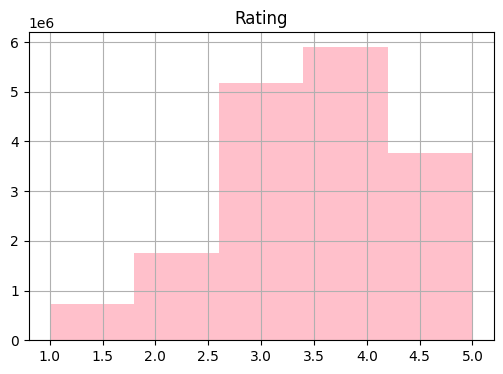

In [ ]:
df.hist('Rating', bins = 5 , color = ["pink"], figsize = (6,4))

In [ ]:
print(f"Skewness: {df['Rating'].skew()}")
print(f"Kurtosis: {df['Rating'].kurt()}")

Skewness: -0.46760826363307195
Kurtosis: -0.3123448328772125


###**Rating Distribution**

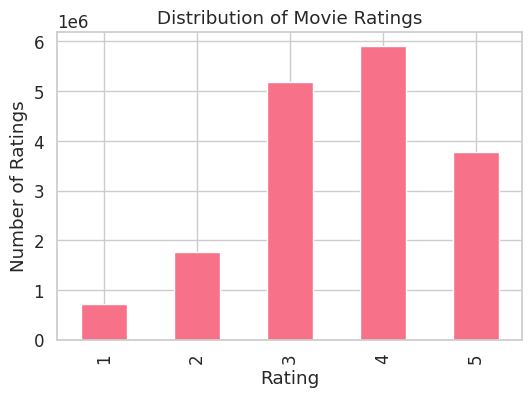

In [ ]:
plt.figure(figsize=(6,4))
sns.set_theme(
    style="whitegrid",
    palette="husl",
    font_scale=1.1
)
df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.title("Distribution of Movie Ratings")
plt.show()

###**Rating per user**

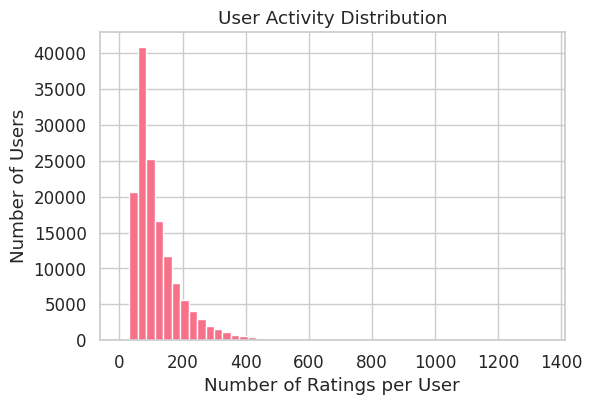

In [ ]:
ratings_per_user = df.groupby('User_ID')['Rating'].count()

plt.figure(figsize=(6,4))
husl = sns.color_palette("husl", n_colors=len(ratings_per_user))
plt.hist(ratings_per_user, bins=50)
plt.xlabel("Number of Ratings per User")
plt.ylabel("Number of Users")
plt.title("User Activity Distribution")
plt.show()

###**Rating per movie**

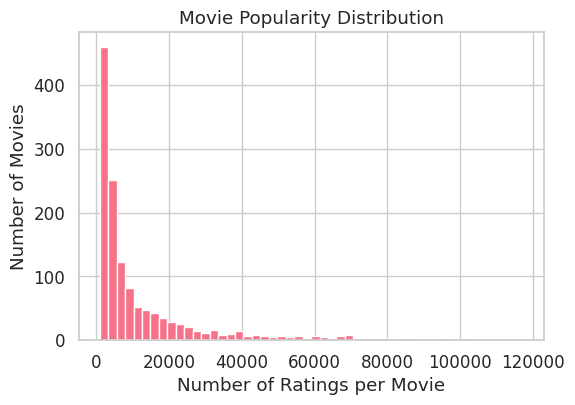

In [ ]:
ratings_per_movie = df.groupby('Movie_ID')['Rating'].count()

plt.figure(figsize=(6,4))
husl = sns.color_palette("husl", n_colors=len(ratings_per_movie))
plt.hist(ratings_per_movie, bins=50)
plt.xlabel("Number of Ratings per Movie")
plt.ylabel("Number of Movies")
plt.title("Movie Popularity Distribution")
plt.show()

###**Boxplot of ratings**

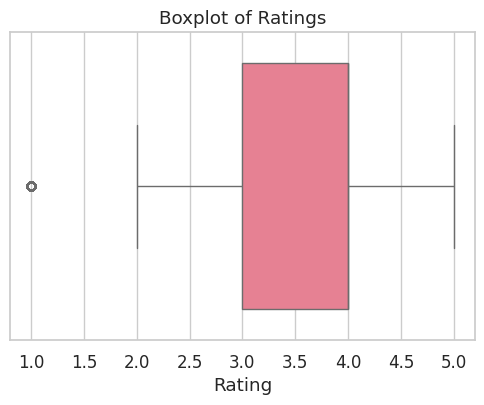

In [ ]:
plt.figure(figsize=(6,4))
sns.set_theme(
    style="whitegrid",
    palette="husl",
    font_scale=1.1
)
sns.boxplot(x=df['Rating'])
plt.title("Boxplot of Ratings")
plt.show()

###**Top 10 Most Rated Movies**

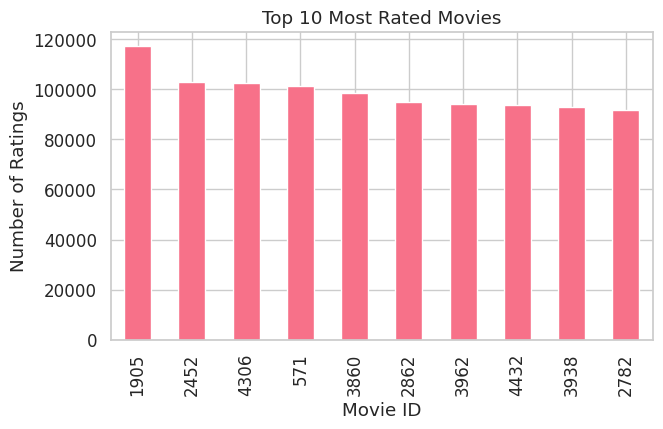

In [ ]:
top_movies = df['Movie_ID'].value_counts().head(10)

plt.figure(figsize=(7,4))
sns.set_theme(
    style="whitegrid",
    palette="husl",
    font_scale=1.1
)
top_movies.plot(kind='bar')
plt.xlabel("Movie ID")
plt.ylabel("Number of Ratings")
plt.title("Top 10 Most Rated Movies")
plt.show()

###**Average Rating per Movie**

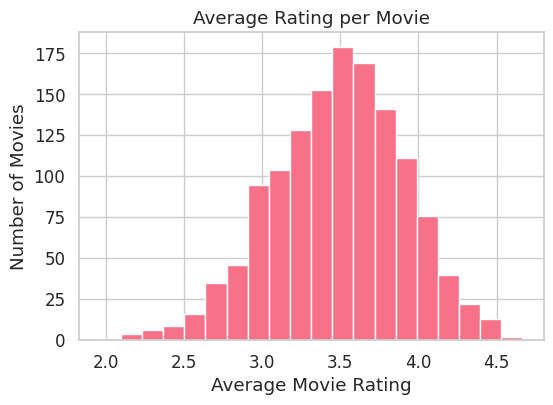

In [ ]:
mean_movie_rating = df.groupby('Movie_ID')['Rating'].mean()

plt.figure(figsize=(6,4))
sns.set_theme(
    style="whitegrid",
    palette="husl",
    font_scale=1.1
)
plt.hist(mean_movie_rating, bins=20)
plt.xlabel("Average Movie Rating")
plt.ylabel("Number of Movies")
plt.title("Average Rating per Movie")
plt.show()

##**Train Test Split**

In [ ]:
x = df.drop('Rating', axis = 1)
y = df['Rating']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [ ]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((13869966, 2), (3467492, 2), (13869966,), (3467492,))

##**Modeling**

###**Linear Regression model**
*Linear Regression was used as a baseline model to establish a reference performance.*

In [ ]:
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

####**Model Prediction**

In [ ]:
y_pred = lr.predict(x_test)
print("Accuracy --> ", lr.score(x_test, y_test)*100)

print(f"Predict Value: {y_pred[150]}")
print(f"Real Value: {y_test.iloc[150]}")

Accuracy -->  0.02182083428482473
Predict Value: 3.5930931358553395
Real Value: 1


####**Model Evaluation**
**Evaluation Results:**

* Mean Absolute Error (MAE): ~0.89

* Root Mean Squared Error (RMSE): ~1.06

* R² Score: ~0.0002

**Observation:** Linear Regression was unable to capture user–movie interaction patterns effectively because user and movie IDs are categorical in nature.

In [ ]:
y_pred = lr.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error : {round(float(mae),4)}")
print(f"Mean Squared Error : {round(float(mse), 4)}")
print(f"Root Mean Squared Error : {round(float(rmse),4)}")
print(f"R-squared : {round(float(r2), 4)}")

Mean Absolute Error : 0.8916
Mean Squared Error : 1.1296
Root Mean Squared Error : 1.0628
R-squared : 0.0002


###**Decision Tree model**
*A Decision Tree Regressor was applied to model non-linear relationships.*

In [ ]:
model = DecisionTreeRegressor()
#Fit the model
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(x_test)
print("Accuracy --> ", model.score(x_test, y_test)*100)

print(f"Predict Value: {y_pred[150]}")
print(f"Real Value: {y_test.iloc[150]}")

Accuracy -->  -74.9557922511962
Predict Value: 4.0
Real Value: 1


####**Model Evaluation**
**Evaluation Results:**

* RMSE: ~1.40

* R² Score: Negative

**Observation:** The Decision Tree model suffered from overfitting, leading to poor generalization on unseen data

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error : {round(float(mae),4)}")
print(f"Mean Squared Error : {round(float(mse), 4)}")
print(f"Root Mean Squared Error : {round(float(rmse),4)}")
print(f"R-squared : {round(float(r2), 4)}")

Mean Absolute Error : 1.0604
Mean Squared Error : 1.9767
Root Mean Squared Error : 1.406
R-squared : -0.7496


##**Cross validation**

* To ensure model stability, 5-fold cross-validation was performed.

* Linear Regression showed near-zero or slightly negative R² scores across folds

* This confirms that the baseline model performance is consistent but limited.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

scores = cross_val_score(
    model,
    x,
    y,
    cv=5,
    scoring='r2'
)

print("Linear regression CV Scores:", scores)
print("Linear regression Average R2:", scores.mean())

Linear regression CV Scores: [-1.46484403e-04 -1.20733695e-04  4.05109997e-05  2.45219175e-04
 -1.19632104e-04]
Linear regression Average R2: -2.0224005576885418e-05


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dt = DecisionTreeRegressor(random_state=42)

scores = cross_val_score(
    dt,
    x,
    y,
    cv=5,
    scoring='r2'
)

print("CV Scores:", scores)
print("Average R2:", scores.mean())

CV Scores: [-1.40070905 -1.33053637 -1.04213587 -0.99601533 -0.88565623]
Average R2: -1.131010570495419


##**Hyper parameter tuning**

Hyperparameter tuning was applied using GridSearchCV for the Decision Tree Regressor.

Although tuning slightly improved performance, the model still remained limited due to the nature of the features.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Model
lr = LinearRegression()

# Hyperparameter grid (ONLY valid params)
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# GridSearchCV
grid = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=1
)

# Fit
grid.fit(x_train, y_train)

# Results
print("Best Parameters:", grid.best_params_)
print("Best CV R2 Score:", grid.best_score_)


Best Parameters: {'fit_intercept': True, 'positive': False}
Best CV R2 Score: 0.00023873388541055806


In [28]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(
    dt,
    param_grid,
    cv=5,
    scoring='r2'
)

grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10}
Best CV Score: 0.05304134456178065


##**Unseen Movie Rating Prediction**

The trained models are capable of predicting ratings for unseen (User_ID, Movie_ID) combinations.

**Explanation:**

An unseen movie refers to a movie that a user has not rated before

The model estimates a rating based on learned patterns from historical data

Predictions represent numerical estimates of expected user ratings

Movies with higher historical average ratings tend to receive higher predicted ratings.

###**Summary:**

*This project presents a comprehensive analysis of Netflix movie ratings using simple machine learning models. While baseline regression models provide limited predictive performance, the project successfully demonstrates data analysis, model evaluation, and the importance of advanced recommendation techniques for real-world applications.*
